## Bank Customers Profile Analysis
#### Python · Credit Card Dataset for Clustering

About Dataset
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical) 
- BALANCE : Balance amount left in their account to make purchases
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [29]:
import pandas as pd
import numpy as np

In [30]:
data = pd.read_csv("CCGENERAL.csv")
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [31]:
data.shape

(8950, 18)

In [32]:
data = data.drop(columns=["CUST_ID", "TENURE"])
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [33]:
missing = data.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [34]:
data.fillna(data.median(), inplace=True)
missing = data.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


### Normalized

In [38]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(data)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

### Silhouette score
- the model's evaluation metric is the silhouette.
- the silhouette is a measure of how similar a point is to its own cluster (coherence) in relation to other clusters (separation).
- A value closer to 1 indicates clusters that are further apart from each other.

In [47]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.3486361382475878

### Davies-Bouldin Index
- The Davies-Bouldin index is a measure of how well clusters are separated from one another.
- The index is calculated as the average of the distances between the clusters, divided by the greatest distance between the centroids of the clusters.
- A lower value indicates clusters that are further apart from each other.

In [46]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.152656566599234

### Calinski-Harabasz Index¶
- The Calinski-Harabasz index is a measure of how well clusters are separated from each other.
- The index is calculated as the ratio between the intra-cluster dispersion and the inter-cluster dispersion.
- A higher value indicates clusters that are further apart from each other.

In [45]:
chs = metrics.calinski_harabasz_score(values, labels)
chs

3422.843133880479

In [51]:
def clustering_algorithms(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    y_pred = kmeans.fit_predict(dataset)
    labels = kmeans.labels_
    silhouette = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    chs = metrics.calinski_harabasz_score(dataset, labels)
    return silhouette, dbs, chs

In [65]:
sl1, dbs1, chs1 = clustering_algorithms(3, values)
print(sl1, dbs1, chs1)

0.32723798026310313 1.3095216018943303 3526.4553723329195


In [66]:
sl2, dbs2, chs2 = clustering_algorithms(5, values)
print(sl2, dbs2, chs2)

0.36451198422831005 1.0754963863506781 3431.7947670502285


In [67]:
sl3, dbs3, chs3 = clustering_algorithms(10, values)
print(sl3, dbs3, chs3)

0.35143698069310725 1.1159246803657865 3019.1989463389277


### Relative validation
- Relative validation is a way of assessing the quality of a cluster by comparing it to an index-reference cluster.

Buying clusters with a random set of data
- The random dataset is generated with the same number of clusters and the same amount of data as the original dataset.
- With this validation, we can know whether or not our dataset makes sense to be clustered.

In [74]:
import numpy as np
random_data = np.random.rand(data.count()[0], data.shape[1])

In [75]:
slr, dbsr, chsr = clustering_algorithms(5, random_data)
print(slr, dbsr, chsr)

0.039557638959660066 3.5907806103427107 302.55577081042145


### Stability of clusters
Our next step is to validate the stability of the cluster. The idea is that we divide the database and run kmeans for each of these divisions in order to obtain similar results for the metrics, as we want kmeans to behave similarly in each one in order to achieve validation.

In [78]:
set1, set2, set3 = np.array_split(values,3)
slr1, dbsr1, chsr1 = clustering_algorithms(5, set1)
slr2, dbsr2, chsr2 = clustering_algorithms(5, set2)
slr3, dbsr3, chsr3 = clustering_algorithms(5, set3)
print(slr1, dbsr1, chsr1)
print(slr2, dbsr2, chsr2)
print(slr3, dbsr3, chsr3)

0.3692394281565564 1.0542285878005098 1203.967782359789
0.3533685733592382 1.1419144796646459 1194.9339115592923
0.36704573758244236 1.0990426578873271 1167.5322875560994


### Interpretation of clusters

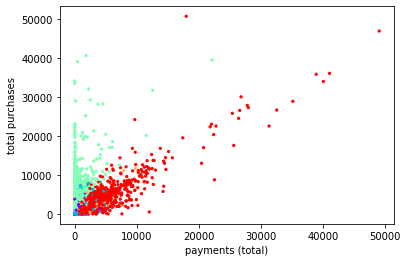

In [79]:
import matplotlib.pyplot as plt

plt.scatter(data['PURCHASES'],data['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('payments (total)')
plt.ylabel('total purchases')
plt.show()

we can see that in this case, for example, the red cluster can be represented as that of customers who use the credit card limit (total purchases), however do not pay the bill in full. This can be seen as the red cluster has a high credit limit value and a low invoice payment amount.

In the case of the cluster marked by the purple color, we can see that the purple cluster can be represented as customers who pay the invoice in full or almost. This can be seen, as the purple cluster grows proportionally to the invoice payment amount.

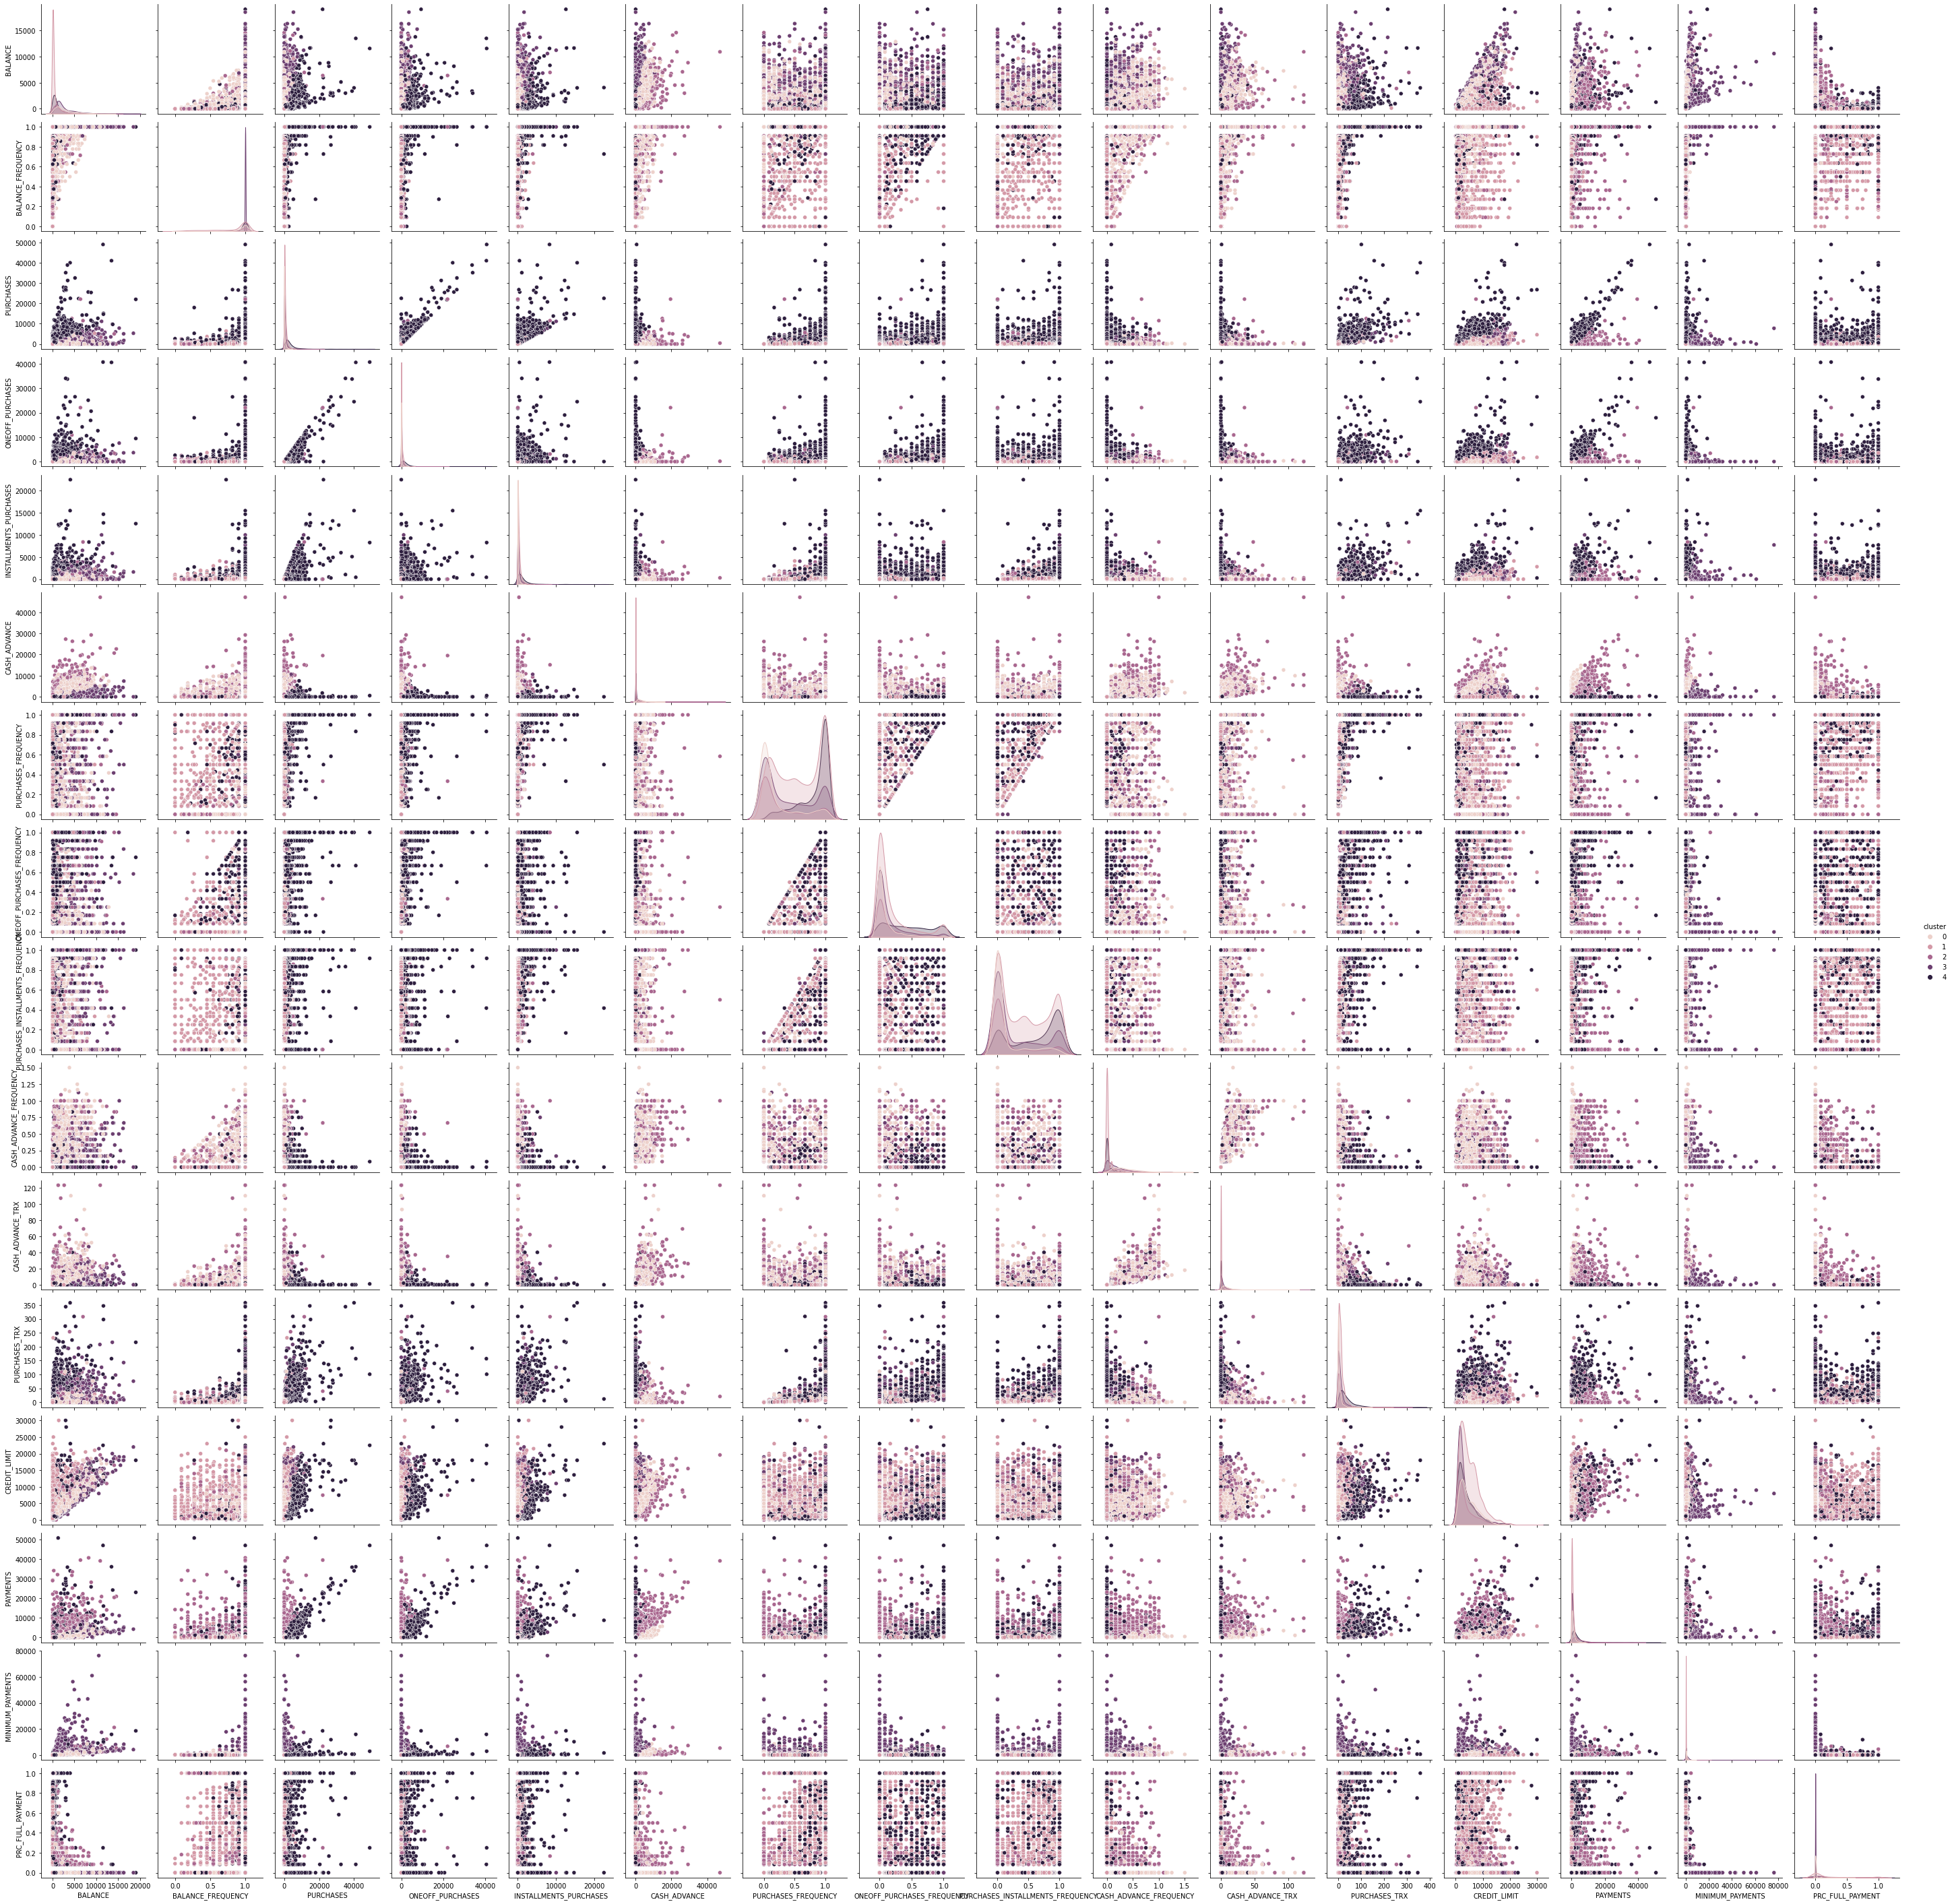

In [80]:
import seaborn as sns
data["cluster"]=labels
sns.pairplot(data[0:],hue='cluster')

### Describing the attributes

In [82]:
data.groupby(by='cluster').describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        1315.0  2719.616192  2230.337145    1.691842  1035.647960   
1        3315.0   488.802028   936.433585    0.000000    24.078900   
2        1001.0  1748.854674  1987.975020    0.000000   486.170360   
3        1825.0  2949.582558  2565.494710  114.523682  1216.893766   
4        1494.0  1118.998658  1627.007380    0.000000   212.520398   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2080.312991  3782.283750  12856.152510            1315.0  0.906890   
1          85.881798   448.965814   9630.367575            3315.0  0.780972   
2        1060.422892  2241.092286  14581.459140            1001.0  0.858535   
3        1843.308668  4021.881912  18495.558550            1825.0  0.996860   
4         543.237203  1337.212684  19043.138560            1494.0  0.931343   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1164.174894   8644.138069           1315.0  0.007450   
1        ...       260.172137   3933.230932           3315.0  0.244951   
2        ...       931.105425  21235.065300           1001.0  0.129974   
3        ...      1961.161822  76406.207520           1825.0  0.001062   
4        ...       531.787024  18621.013310           1494.0  0.282392   

                                                           
              std  min  25%       50%       75%       max  
cluster                                                    
0        0.041141  0.0  0.0  0.000000  0.000000  0.600000  
1        0.345886  0.0  0.0  0.000000  0.436507  1.000000  
2        0.198876  0.0  0.0  0.083333  0.166667  1.000000  
3        0.013400  0.0  0.0  0.000000  0.000000  0.416667  
4        0.369194  0.0  0.0  0.083333  0.567461  1.000000  

[5 rows x 128 columns]

In [84]:
centroids = kmeans.cluster_centers_
centroids

array([[3.92225952e-01, 2.21961434e-04, 4.08966140e-02, 2.41375044e-02,
        1.67632013e-02, 4.69796685e-01, 4.57220814e-05, 1.60226742e-05,
        3.02199798e-05, 7.74424778e-05, 1.73808813e-03, 7.90301737e-04,
        7.16380049e-01, 1.49362355e-01, 1.32273009e-01, 2.04476303e-06],
       [7.41435057e-02, 2.30598606e-04, 1.22644337e-01, 4.91336388e-02,
        7.36112623e-02, 2.02012160e-02, 1.72105136e-04, 3.41056055e-05,
        1.39398511e-04, 7.56585643e-06, 1.18718703e-04, 2.87194118e-03,
        9.43090102e-01, 1.54954100e-01, 5.72048927e-02, 7.55013476e-05],
       [2.27283461e-01, 2.12919599e-04, 6.90552841e-02, 3.82103280e-02,
        3.08505405e-02, 3.64415621e-01, 5.84848743e-05, 2.24756747e-05,
        3.97948056e-05, 5.90776324e-05, 1.43098394e-03, 1.30916105e-03,
        5.19057140e-01, 6.31517578e-01, 1.13827521e-01, 3.10899781e-05],
       [5.34719561e-01, 3.07483975e-04, 9.40143076e-02, 4.50451970e-02,
        4.90841876e-02, 8.42618546e-02, 1.03569613e-04, 3.287

In [90]:
max = len(centroids[0])
for i in range(max):
   print(data.columns.values[i],"{:.4f}".format(centroids[:,i].var()))

BALANCE 0.0276
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0219
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0037
CASH_ADVANCE 0.0351
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0210
PAYMENTS 0.0348
MINIMUM_PAYMENTS 0.0078
PRC_FULL_PAYMENT 0.0000


BALANCE 0.0276
PURCHASES 0.0219
CASH_ADVANCE 0.0351
CREDIT_LIMIT 0.0210
PAYMENTS 0.0348

In [105]:
description = data.groupby(by='cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']]

n_clients = description.size()
description = description.mean()
description["n_clients"] = n_clients
description

BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        2719.616192   251.530144   3004.448265   4782.091255  1008.915227   
1         488.802028   640.242015    126.097601   5178.415315   827.711487   
2        1748.854674   531.250120   3064.439069   3914.956256  4961.223005   
3        2949.582558   559.479945    573.495675   3730.000000  1050.324877   
4        1118.998658  3328.438133    186.010928   4044.718977  3050.885706   

         n_clients  
cluster             
0             1315  
1             3315  
2             1001  
3             1825  
4             1494

In [106]:
data.groupby(by='cluster')['PRC_FULL_PAYMENT'].describe()

count      mean       std  min  25%       50%       75%       max
cluster                                                                    
0        1315.0  0.007450  0.041141  0.0  0.0  0.000000  0.000000  0.600000
1        3315.0  0.244951  0.345886  0.0  0.0  0.000000  0.436507  1.000000
2        1001.0  0.129974  0.198876  0.0  0.0  0.083333  0.166667  1.000000
3        1825.0  0.001062  0.013400  0.0  0.0  0.000000  0.000000  0.416667
4        1494.0  0.282392  0.369194  0.0  0.0  0.083333  0.567461  1.000000

### Interpretation of clusters
- CLUSTER 0: Customers who spend the most on purchases and pay the invoice in full or almost in full. Best payers.
- CLUSTER 1: Customers withdraw a lot, but don't buy a lot and don't pay a lot. Worst payers.
- CLUSTER 2: Customers who have a high limit, but have a low balance and buy little. Good payers.
- CLUSTER 3: Customers with a good credit limit and who spend moderately. Pay sometimes.
- CLUSTER 4: Customers who withdraw more money and have a low credit limit. Bad payers.
- CONCLUSION: Clusters 1 and 4 are the worst payers, while clusters 0 and 2 are the best payers, with cluster 3 an intermediate payer, neither Good nor Bad.

- Cluster 0 has the least amount of customers
- Cluster 2 has the highest amount of customers
- Cluster 1 is second in number of customers